### Harris Corner Detection

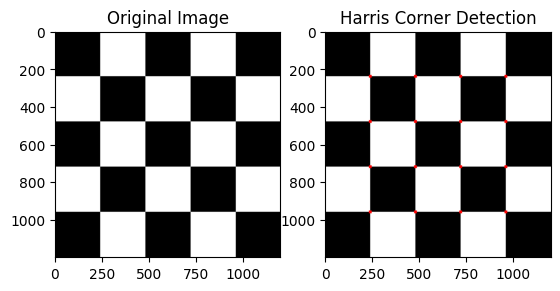

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/figure.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
float_image = np.float32(gray_image)


threshold=0.01
new_image = cv2.cornerHarris(float_image,12,3,0.04)
new_image =cv2.dilate(new_image,None)
image[new_image > threshold * new_image.max()] = [255,0,0]

# Display the images
image2= cv2.imread('/content/figure.png')
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Harris Corner Detection')
plt.show()

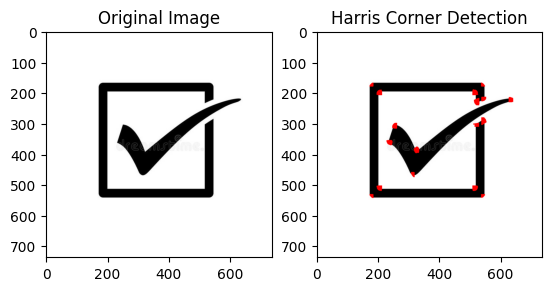

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/chess.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
float_image = np.float32(gray_image)


threshold=0.15
new_image = cv2.cornerHarris(gray_image,20,3,0.04)
new_image =cv2.dilate(new_image,None)
image[new_image > threshold * new_image.max()] = [255,0,0]

# Display the images
image2= cv2.imread('/content/chess.jpg')
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Harris Corner Detection')
plt.show()

### Fully Connected Network

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2240 - accuracy: 0.9357
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0922 - accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0610 - accuracy: 0.9811
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0331 - accuracy: 0.9895
Test loss: 0.07066240161657333
Test accuracy: 0.9796000123023987
313/313 [==============================] - 1s 2ms/step


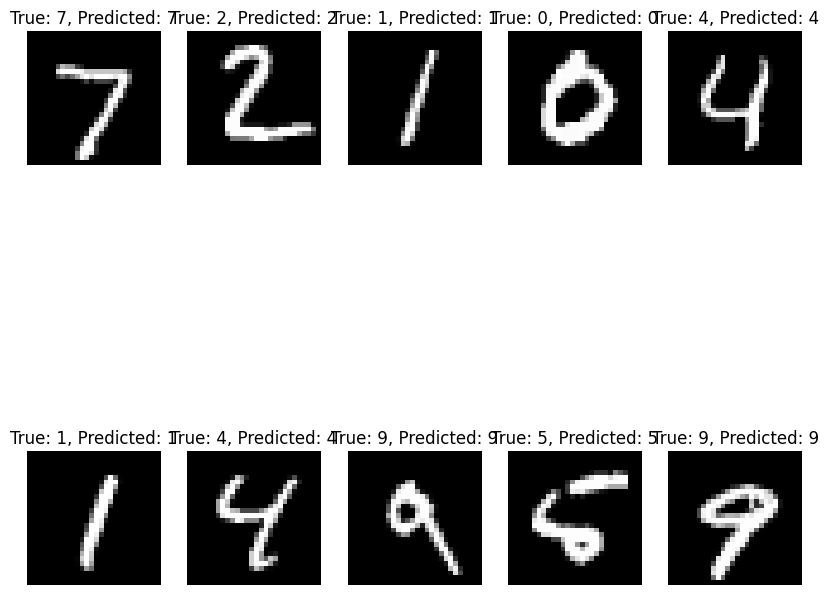

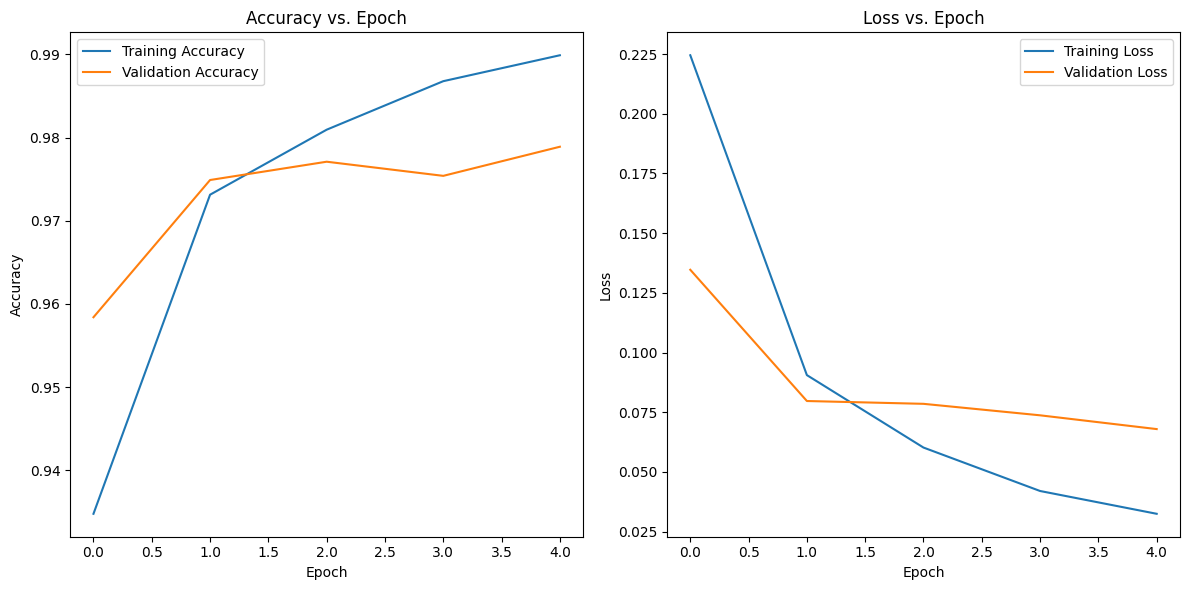

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 128
num_classes = 10
epochs = 5 # Changed the number of epochs for faster training
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )
model.fit(x_train, y_train, epochs=epochs)
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
plt.figure(figsize=(10, 10))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}")
  plt.axis('off')
plt.show()
plt.figure(figsize=(12, 6))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2236 - accuracy: 0.9351 - val_loss: 0.1125 - val_accuracy: 0.9654
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0920 - accuracy: 0.9713 - val_loss: 0.0820 - val_accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0618 - accuracy: 0.9808 - val_loss: 0.0760 - val_accuracy: 0.9763
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.0639 - val_accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0684 - val_accuracy: 0.9796
Test loss: 0.06838131695985794
Test accuracy: 0.9796000123023987
313/313 [==============================] - 1s 2ms/step


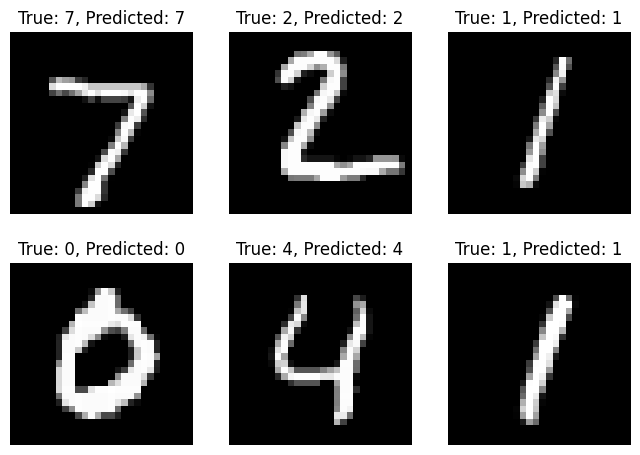

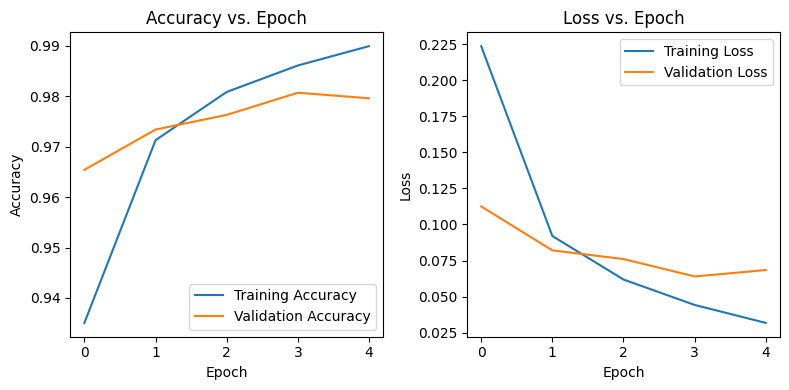

In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

batch_size = 128
num_classes = 10
epochs = 5

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(8, 5.5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

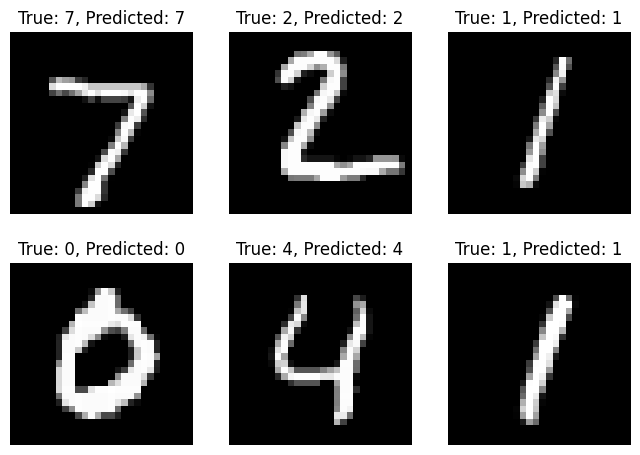

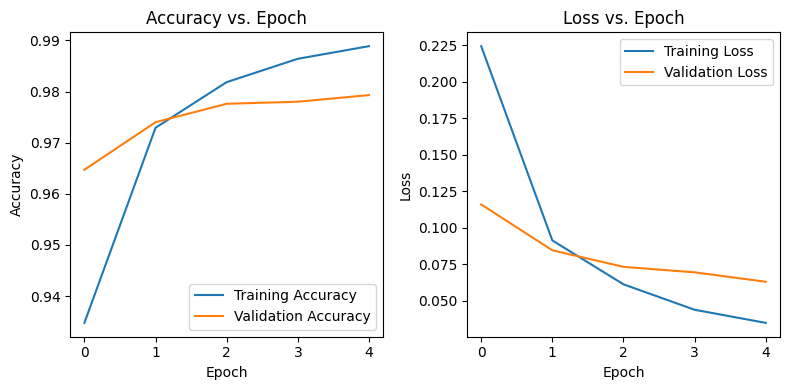

In [ ]:
plt.figure(figsize=(8, 5.5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

plt.figure(figsize=(8, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)

plt.tight_layout()
plt.show()

### CNN

Epoch 1/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.1045 - accuracy: 0.9678 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 2/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0379 - val_accuracy: 0.9879
Epoch 3/5
1875/1875 [==============================] - 191s 102ms/step - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.0381 - val_accuracy: 0.9885
Epoch 4/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0336 - val_accuracy: 0.9909
Epoch 5/5
1875/1875 [==============================] - 198s 106ms/step - loss: 0.0102 - accuracy: 0.9969 - val_loss: 0.0367 - val_accuracy: 0.9904
Test loss: 0.03667973726987839
Test accuracy: 0.9904000163078308
313/313 [==============================] - 7s 22ms/step


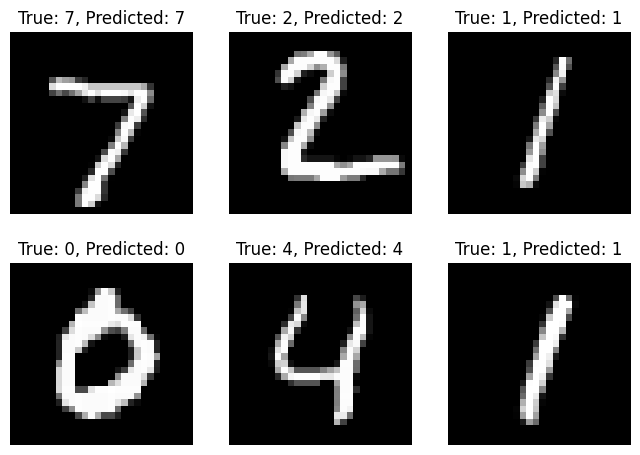

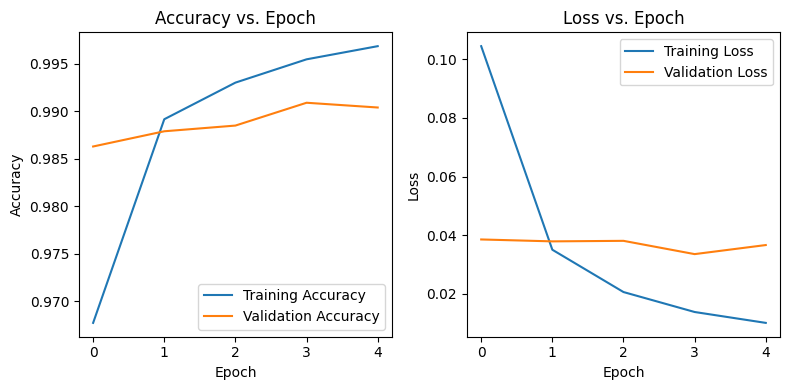

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()
batch_size = 128
num_classes = 10
epochs = 5 # Changed the number of epochs for faster training
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(8, 5.5))
for i in range(6):
  plt.subplot(2, 3, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title(f"True: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}")
  plt.axis('off')
plt.show()
plt.figure(figsize=(8, 4))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()

### Lab Final

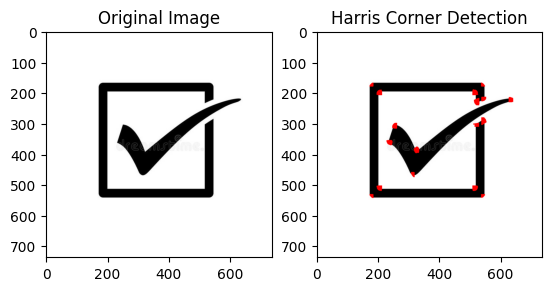

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('/content/chess.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
float_image = np.float32(gray_image)


threshold=0.15
new_image = cv2.cornerHarris(gray_image,20,3,0.04)
new_image =cv2.dilate(new_image,None)
image[new_image > threshold * new_image.max()] = [255,0,0]


image2= cv2.imread('/content/chess.jpg')
plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title('Harris Corner Detection')
plt.show()

### Assignment

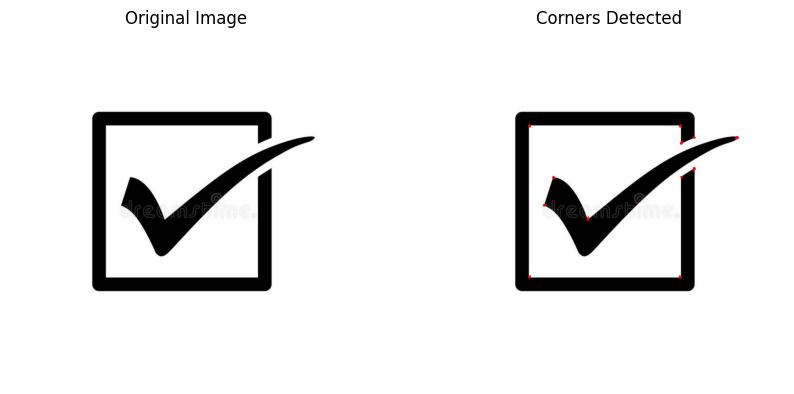

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def harris_corner_detection(image, k=0.04, threshold=0.005, block_size=20):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.float32)

    # Compute derivatives
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=block_size)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=block_size)

    # Compute products of derivatives at each pixel
    Ixx = Ix * Ix
    Iyy = Iy * Iy
    Ixy = Ix * Iy

    #print("Size and dimensions of Ix:", Ix.shape)
    #print("Size and dimensions of Iy:", Iy.shape)
    #print("Size and dimensions of Ixy:", Ixy.shape)
    #print("Size and dimensions of Ixx:", Ixx.shape)
    #print("Ix Matrix:")
    #print(Ix)

    #print("\nIy Matrix:")
    #print(Iy)

    #print("\nIxy Matrix:")
    #print(Ixy)

    # Compute sums of products of derivatives using a Gaussian filter
    window_size = 5
    kernel = np.ones((window_size, window_size), np.float32) / (window_size ** 2)
    Sxx = cv2.filter2D(Ixx, -1, kernel)
    Syy = cv2.filter2D(Iyy, -1, kernel)
    Sxy = cv2.filter2D(Ixy, -1, kernel)

    # Compute Harris corner response
    det_M = Sxx * Syy - Sxy**2
    trace_M = Sxx + Syy
    R = det_M - k * trace_M**2

    # Apply thresholding to detect corners
    corners = np.zeros_like(R)
    corners[R > threshold * R.max()] = 255

    return corners.astype(np.uint8)

# Read an example image
image = cv2.imread('/content/chess.jpg')

# Function Call
corners_image = harris_corner_detection(image, block_size=9)

# Display the original and corner-detected images
plt.figure(figsize=(10, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Corners Detected Image
color_corners_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
color_corners_image[corners_image > 0] = [255, 0, 0]  # Mark corners in red
plt.subplot(1, 2, 2)
plt.imshow(color_corners_image)
plt.title('Corners Detected')
plt.axis('off')

plt.show()